# SIP Calculator 

Modern SIP Calculator with green accents and growth chart!

**Features:**
1. SIP and Lump Sum calculations
2. Pie chart showing invested vs maturity
3. Growth chart showing month-by-month progression

**Required modules:**
- `pip install customtkinter`
- `pip install matplotlib`
- `pip install numpy`
- `pip install plotly`

## **OPTIONAL:**
1. `pip install pyinstaller`
2. go into your terminal
3. cd to where the .py file is located
4. run the following command in your terminal:
`pyinstaller -F -w SIP_calculator.py`


## Import modules

In [ ]:
import customtkinter as ctk
import tkinter as tk
import math
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from tkinter import messagebox

## With Matplotlib (same as the one in the .exe file)

206908 120000


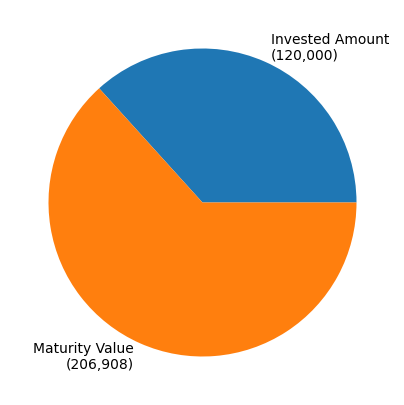

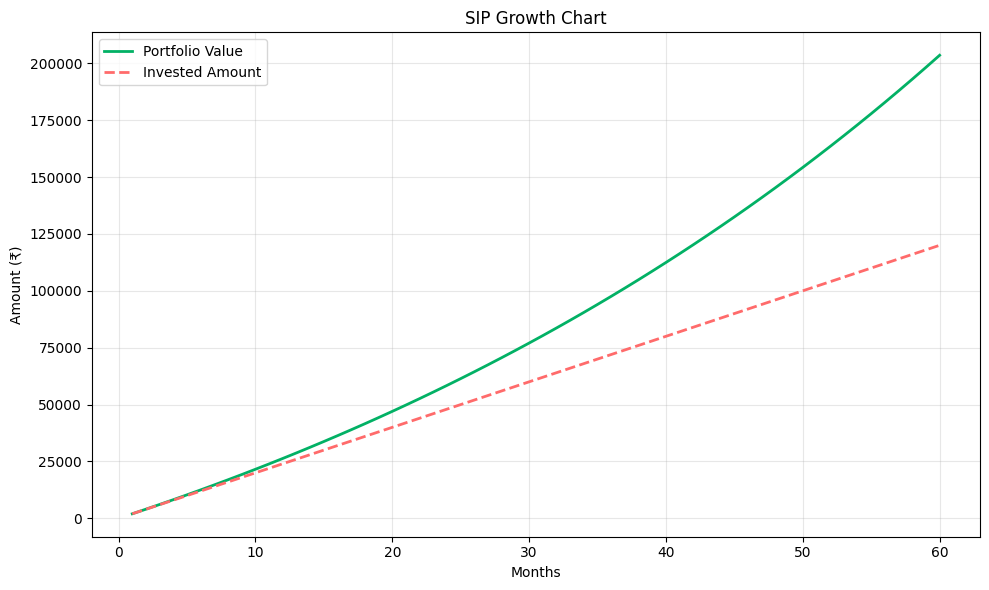

In [ ]:
ctk.set_appearance_mode("bright")
ctk.set_default_color_theme("blue")

class App(ctk.CTk):
    
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)

        def dispPie(self,M,N):
            names = ['Invested Amount\n('+str(format(N,',d'))+')','Maturity Value\n('+str(format(M,',d'))+')'] 
            pi = np.array([N,M])
            fig = plt.figure(figsize=(5,5))

            plt.pie(pi,labels= names)
            plt.show()

        def dispGrowth(self, kind, P, years, per):
            i = per/12.0
            n = years*12
            months = list(range(1, n+1))
            values = []
            invested = []
            
            if kind == 'sip':
                v = 0
                for m in months:
                    v = v*(1+i) + P
                    values.append(v)
                    invested.append(P*m)
            else:  # lump sum
                for m in months:
                    v = P*((1+i)**m)
                    values.append(v)
                    invested.append(P)
            
            fig = plt.figure(figsize=(10,6))
            plt.plot(months, values, label='Portfolio Value', linewidth=2, color='#02b165')
            plt.plot(months, invested, label='Invested Amount', linewidth=2, color='#ff6b6b', linestyle='--')
            plt.xlabel('Months')
            plt.ylabel('Amount (₹)')
            plt.title(f'{kind.upper()} Growth Chart')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        def Display(self,M,N,kind='sip',P=0,years=0,per=0):
            self.MatDisp.configure(text=str(format(M,',d')))
            self.AmtDisp.configure(text=str(format(N,',d')))
            self.Details = ctk.CTkButton(self,text='Pie Chart',fg_color = '#02b165',border_color='#02b165',command = lambda: dispPie(self,M,N))
            self.Details.grid(row = 6, column = 0, padx = 20, pady = 20, sticky= 'ew')
            self.Growth = ctk.CTkButton(self,text='Growth Chart',fg_color = '#02b165',border_color='#02b165',command = lambda: dispGrowth(self,kind,P,years,per))
            self.Growth.grid(row = 7, column = 0, padx = 20, pady = 20, sticky= 'ew')
            # dispPie(self,M,N)


        def getSip(self,amt,te,pe) :
            P = amt
            i = float(pe/12)
            n = te*12

            M = int(P * ((pow((1+i),n)-1)/i) * (1+i))
            N = int(amt*n)
            print(M,N)
            Display(self,M,N,'sip',amt,te,pe)

        def getLump(self,lsamt,te,pe):
            P=lsamt
            M = math.ceil(P*(pow(1+pe,te)))
            print(M,P)
            Display(self,M,P,'lump',lsamt,te,pe)


        def mixedletters(quant):
            for i in range(len(quant)):
                if quant[i].isalpha():
                    return True
            return False

        def pressedCalculate():

            global tenure
            if self.ten.get() == '':
                messagebox.showerror('Error','Please enter the tenure of your investment')
                return
            elif '.' in self.ten.get():
                messagebox.showerror('Error','Entered a fractional value')
                return
            elif self.ten.get().isalpha() or mixedletters(self.ten.get()):
                messagebox.showerror('Error','Only numerical values allowed')
                return
            else :
                tenure = int(self.ten.get())
                if tenure == 0:
                    messagebox.showerror('Error','Tenure is zero')
                    return

            
            global per
            if self.roi.get() == '':
                messagebox.showerror('Error','Please enter the Rate of Return on your investment')
                return
            elif self.roi.get().isalpha() or mixedletters(self.roi.get()):
                messagebox.showerror('Error','Only numerical values allowed')
                return
            else:
                per = float(self.roi.get())
                if per > 0.0:
                    per /= 100
                    if per > 1.00:
                        messagebox.showerror('Error','ROI cannot be greater than 100')
                        return
                else :
                    messagebox.showerror('Error','ROI cannot be zero')
                    return

            
            global amount
            if self.Amt.get() == '' and self.ls.get() =='':
                messagebox.showerror('Error','Please enter Investment Value')
            elif self.ls.get() =='' and self.Amt.get() != '':
                if '.' in self.Amt.get():
                    messagebox.showerror('Error','Entered a fractional value')
                    return
                elif self.Amt.get().isalpha() or mixedletters(self.Amt.get()):
                    messagebox.showerror('Error','Only numerical values allowed')
                    return
                else:
                    amount = int(self.Amt.get())
                    getSip(self,amount,tenure,per)
            elif self.Amt.get() =='' and self.ls.get() != '' :
                if '.' in self.ls.get():
                    messagebox.showerror('Error','Entered a fractional value')
                    return
                elif self.ls.get().isalpha() or mixedletters(self.ls.get()):
                    messagebox.showerror('Error','Only numerical values allowed')
                    return
                else:
                    amount = int(self.ls.get())
                    getLump(self, amount, tenure, per)
            else:
                messagebox.showerror('Error','Please calculate either LumpSum or Sip not both at the same time')              

        def pressedReset():
            self.Amt.delete(0,'end')
            # self.ten.delete(0,'end')
            self.ls.delete(0,'end')
            self.roi.delete(0,'end')
            self.MatDisp.configure(text="")
            self.AmtDisp.configure(text="")
            try:
                self.Details.destroy()
            except:
                pass
            try:
                self.Growth.destroy()
            except:
                pass
            


        self.title("SIP Calculator")
        self.geometry('330x650')

        self.InputFrame = ctk.CTkFrame(master = self,fg_color='#d9f7e7')
        self.InputFrame.grid(row =0,column=0,sticky='ew')

        self.SIPamt = ctk.CTkLabel(master=self.InputFrame,text = 'SIP Amount  ',text_color="black")
        self.SIPamt.grid(row = 0, column = 0, padx = 20, pady = 20, sticky = 'ew')

        self.Amt = ctk.CTkEntry(master=self.InputFrame,placeholder_text = '0',border_color="#02b165" )
        self.Amt.grid(row = 0, column = 1, padx = 20, pady = 20, sticky = 'ew')
        

        self.Tenure = ctk.CTkLabel(master=self.InputFrame, text = "Tenure (in years) ",text_color="black")
        self.Tenure.grid(row = 1, column = 0, padx = 20, pady = 20,sticky = 'ew')

        self.ten = ctk.CTkComboBox(master=self.InputFrame,values = ['5','10','15','20','25','30','35'],border_color="#02b165",button_color="#02b165",dropdown_hover_color="#02b165")
        self.ten.grid(row = 1, column = 1, padx = 20, pady = 20, sticky = 'ew')

        self.ror = ctk.CTkLabel(master=self.InputFrame, text = 'Rate of Return (%) ' ,text_color="black")
        self.ror.grid(row = 2, column = 0, padx = 20, pady = 20,sticky = 'ew')

        self.roi = ctk.CTkEntry(master=self.InputFrame, placeholder_text= '0',border_color="#02b165")
        self.roi.grid(row = 2, column = 1, padx = 20, pady = 20, sticky = 'ew')


        self.lumpSum = ctk.CTkLabel(master=self.InputFrame,text='Lump-sum Amount  ' ,text_color="black")
        self.lumpSum.grid(row = 3, column = 0, padx = 20, pady = 20, sticky = 'ew')

        self.ls = ctk.CTkEntry(master=self.InputFrame, placeholder_text = '0',border_color="#02b165")
        self.ls.grid(row = 3, column = 1, padx = 20, pady = 20, sticky = 'ew')

        self.Output = ctk.CTkFrame(master=self,fg_color='#02b165')
        self.Output.grid(row=1,column=0,sticky='ew')

        self.InvAmt = ctk.CTkLabel(master=self.Output,text ="Invested Amount")
        self.InvAmt.grid(row = 5, column = 0, padx = 20, pady = 20, sticky = 'ew')

        self.AmtDisp = ctk.CTkLabel(master=self.Output,text='')
        self.AmtDisp.grid(row = 5, column = 1, padx=20, pady = 20, sticky = 'ew')

        self.MatVal = ctk.CTkLabel(master=self.Output,text='Maturity Value   ')
        self.MatVal.grid(row = 6, column = 0,padx = 10,pady = 20, sticky = 'ew')

        self.MatDisp = ctk.CTkLabel(master=self.Output,text='')
        self.MatDisp.grid(row = 6, column = 1, padx = 20,pady =20, sticky = 'ew')
        
        self.Calculate = ctk.CTkButton(self,text="Calculate",fg_color="#02b165",border_color="black", command = pressedCalculate)
        self.Calculate.grid(row = 4, column = 0, padx = 20, pady = 20 ,sticky = 'ew')

        self.Reset = ctk.CTkButton(self,text="Reset",fg_color="#02b165",border_color="black",command = pressedReset)
        self.Reset.grid(row = 5,column = 0, padx =20, pady = 20, sticky = 'ew')
        

if __name__=="__main__":
    app = App()
    app.mainloop()

## With Plotly (Better visuals)

In [ ]:



ctk.set_appearance_mode("bright")
ctk.set_default_color_theme("blue")

class App(ctk.CTk):
    
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)

        def dispPie(self,M,N):
            labels = ['Invested Amount', 'Maturity Value']
            values = [N, M]
            colors = ['#ff6b6b', '#02b165']
            
            fig = go.Figure(data=[go.Pie(
                labels=labels,
                values=values,
                marker_colors=colors,
                textinfo='label+percent+value',
                texttemplate='%{label}<br>$%{value:,}<br>(%{percent})',
                hovertemplate='<b>%{label}</b><br>Amount: $%{value:,}<br>Percentage: %{percent}<extra></extra>'
            )])
            
            fig.update_layout(
                title={
                    'text': 'Investment Breakdown',
                    'x': 0.5,
                    'font': {'size': 18, 'color': '#02b165'}
                },
                font={'size': 12},
                showlegend=True,
                width=500,
                height=500
            )
            
            fig.show()

        def dispGrowth(self, kind, P, years, per):
            i = per/12.0
            n = years*12
            months = list(range(1, n+1))
            values = []
            invested = []
            
            if kind == 'sip':
                v = 0
                for m in months:
                    v = v*(1+i) + P
                    values.append(v)
                    invested.append(P*m)
            else:  # lump sum
                for m in months:
                    v = P*((1+i)**m)
                    values.append(v)
                    invested.append(P)
            
            fig = go.Figure()
            
            # Portfolio Value line
            fig.add_trace(go.Scatter(
                x=months,
                y=values,
                mode='lines',
                name='Portfolio Value',
                line=dict(color='#02b165', width=3),
                hovertemplate='<b>Month %{x}</b><br>Portfolio Value: $%{y:,.0f}<extra></extra>'
            ))
            
            # Invested Amount line
            fig.add_trace(go.Scatter(
                x=months,
                y=invested,
                mode='lines',
                name='Invested Amount',
                line=dict(color='#ff6b6b', width=2, dash='dash'),
                hovertemplate='<b>Month %{x}</b><br>Invested Amount: $%{y:,.0f}<extra></extra>'
            ))
            
            fig.update_layout(
                title={
                    'text': f'{kind.upper()} Growth Over Time',
                    'x': 0.5,
                    'font': {'size': 18, 'color': '#02b165'}
                },
                xaxis_title='Months',
                yaxis_title='Amount ($)',
                font={'size': 12},
                hovermode='x unified',
                showlegend=True,
                width=800,
                height=500,
                plot_bgcolor='white',
                xaxis=dict(gridcolor='lightgray'),
                yaxis=dict(gridcolor='lightgray')
            )
            
            fig.show()

        def Display(self,M,N,kind='sip',P=0,years=0,per=0):
            self.MatDisp.configure(text=str(format(M,',d')))
            self.AmtDisp.configure(text=str(format(N,',d')))
            self.Details = ctk.CTkButton(self,text='Pie Chart',fg_color = '#02b165',border_color='#02b165',command = lambda: dispPie(self,M,N))
            self.Details.grid(row = 6, column = 0, padx = 20, pady = 20, sticky= 'ew')
            self.Growth = ctk.CTkButton(self,text='Growth Chart',fg_color = '#02b165',border_color='#02b165',command = lambda: dispGrowth(self,kind,P,years,per))
            self.Growth.grid(row = 7, column = 0, padx = 20, pady = 20, sticky= 'ew')
            # dispPie(self,M,N)


        def getSip(self,amt,te,pe) :
            P = amt
            i = float(pe/12)
            n = te*12

            M = int(P * ((pow((1+i),n)-1)/i) * (1+i))
            N = int(amt*n)
            print(M,N)
            Display(self,M,N,'sip',amt,te,pe)

        def getLump(self,lsamt,te,pe):
            P=lsamt
            M = math.ceil(P*(pow(1+pe,te)))
            print(M,P)
            Display(self,M,P,'lump',lsamt,te,pe)


        def mixedletters(quant):
            for i in range(len(quant)):
                if quant[i].isalpha():
                    return True
            return False

        def pressedCalculate():

            global tenure
            if self.ten.get() == '':
                messagebox.showerror('Error','Please enter the tenure of your investment')
                return
            elif '.' in self.ten.get():
                messagebox.showerror('Error','Entered a fractional value')
                return
            elif self.ten.get().isalpha() or mixedletters(self.ten.get()):
                messagebox.showerror('Error','Only numerical values allowed')
                return
            else :
                tenure = int(self.ten.get())
                if tenure == 0:
                    messagebox.showerror('Error','Tenure is zero')
                    return

            
            global per
            if self.roi.get() == '':
                messagebox.showerror('Error','Please enter the Rate of Return on your investment')
                return
            elif self.roi.get().isalpha() or mixedletters(self.roi.get()):
                messagebox.showerror('Error','Only numerical values allowed')
                return
            else:
                per = float(self.roi.get())
                if per > 0.0:
                    per /= 100
                    if per > 1.00:
                        messagebox.showerror('Error','ROI cannot be greater than 100')
                        return
                else :
                    messagebox.showerror('Error','ROI cannot be zero')
                    return

            
            global amount
            if self.Amt.get() == '' and self.ls.get() =='':
                messagebox.showerror('Error','Please enter Investment Value')
            elif self.ls.get() =='' and self.Amt.get() != '':
                if '.' in self.Amt.get():
                    messagebox.showerror('Error','Entered a fractional value')
                    return
                elif self.Amt.get().isalpha() or mixedletters(self.Amt.get()):
                    messagebox.showerror('Error','Only numerical values allowed')
                    return
                else:
                    amount = int(self.Amt.get())
                    getSip(self,amount,tenure,per)
            elif self.Amt.get() =='' and self.ls.get() != '' :
                if '.' in self.ls.get():
                    messagebox.showerror('Error','Entered a fractional value')
                    return
                elif self.ls.get().isalpha() or mixedletters(self.ls.get()):
                    messagebox.showerror('Error','Only numerical values allowed')
                    return
                else:
                    amount = int(self.ls.get())
                    getLump(self, amount, tenure, per)
            else:
                messagebox.showerror('Error','Please calculate either LumpSum or Sip not both at the same time')              

        def pressedReset():
            self.Amt.delete(0,'end')
            # self.ten.delete(0,'end')
            self.ls.delete(0,'end')
            self.roi.delete(0,'end')
            self.MatDisp.configure(text="")
            self.AmtDisp.configure(text="")
            try:
                self.Details.destroy()
            except:
                pass
            try:
                self.Growth.destroy()
            except:
                pass
            


        self.title("SIP Calculator ")
        self.geometry('330x650')

        self.InputFrame = ctk.CTkFrame(master = self,fg_color='#d9f7e7')
        self.InputFrame.grid(row =0,column=0,sticky='ew')

        self.SIPamt = ctk.CTkLabel(master=self.InputFrame,text = 'SIP Amount  ',text_color="black")
        self.SIPamt.grid(row = 0, column = 0, padx = 20, pady = 20, sticky = 'ew')

        self.Amt = ctk.CTkEntry(master=self.InputFrame,placeholder_text = '0',border_color="#02b165" )
        self.Amt.grid(row = 0, column = 1, padx = 20, pady = 20, sticky = 'ew')
        

        self.Tenure = ctk.CTkLabel(master=self.InputFrame, text = "Tenure (in years) ",text_color="black")
        self.Tenure.grid(row = 1, column = 0, padx = 20, pady = 20,sticky = 'ew')

        self.ten = ctk.CTkComboBox(master=self.InputFrame,values = ['5','10','15','20','25','30','35'],border_color="#02b165",button_color="#02b165",dropdown_hover_color="#02b165")
        self.ten.grid(row = 1, column = 1, padx = 20, pady = 20, sticky = 'ew')

        self.ror = ctk.CTkLabel(master=self.InputFrame, text = 'Rate of Return (%) ' ,text_color="black")
        self.ror.grid(row = 2, column = 0, padx = 20, pady = 20,sticky = 'ew')

        self.roi = ctk.CTkEntry(master=self.InputFrame, placeholder_text= '0',border_color="#02b165")
        self.roi.grid(row = 2, column = 1, padx = 20, pady = 20, sticky = 'ew')


        self.lumpSum = ctk.CTkLabel(master=self.InputFrame,text='Lump-sum Amount  ' ,text_color="black")
        self.lumpSum.grid(row = 3, column = 0, padx = 20, pady = 20, sticky = 'ew')

        self.ls = ctk.CTkEntry(master=self.InputFrame, placeholder_text = '0',border_color="#02b165")
        self.ls.grid(row = 3, column = 1, padx = 20, pady = 20, sticky = 'ew')

        self.Output = ctk.CTkFrame(master=self,fg_color='#02b165')
        self.Output.grid(row=1,column=0,sticky='ew')

        self.InvAmt = ctk.CTkLabel(master=self.Output,text ="Invested Amount")
        self.InvAmt.grid(row = 5, column = 0, padx = 20, pady = 20, sticky = 'ew')

        self.AmtDisp = ctk.CTkLabel(master=self.Output,text='')
        self.AmtDisp.grid(row = 5, column = 1, padx=20, pady = 20, sticky = 'ew')

        self.MatVal = ctk.CTkLabel(master=self.Output,text='Maturity Value   ')
        self.MatVal.grid(row = 6, column = 0,padx = 10,pady = 20, sticky = 'ew')

        self.MatDisp = ctk.CTkLabel(master=self.Output,text='')
        self.MatDisp.grid(row = 6, column = 1, padx = 20,pady =20, sticky = 'ew')
        
        self.Calculate = ctk.CTkButton(self,text="Calculate",fg_color="#02b165",border_color="black", command = pressedCalculate)
        self.Calculate.grid(row = 4, column = 0, padx = 20, pady = 20 ,sticky = 'ew')

        self.Reset = ctk.CTkButton(self,text="Reset",fg_color="#02b165",border_color="black",command = pressedReset)
        self.Reset.grid(row = 5,column = 0, padx =20, pady = 20, sticky = 'ew')
        

if __name__=="__main__":
    app = App()
    app.mainloop()

206908 120000
